# Fake Currency Prediction

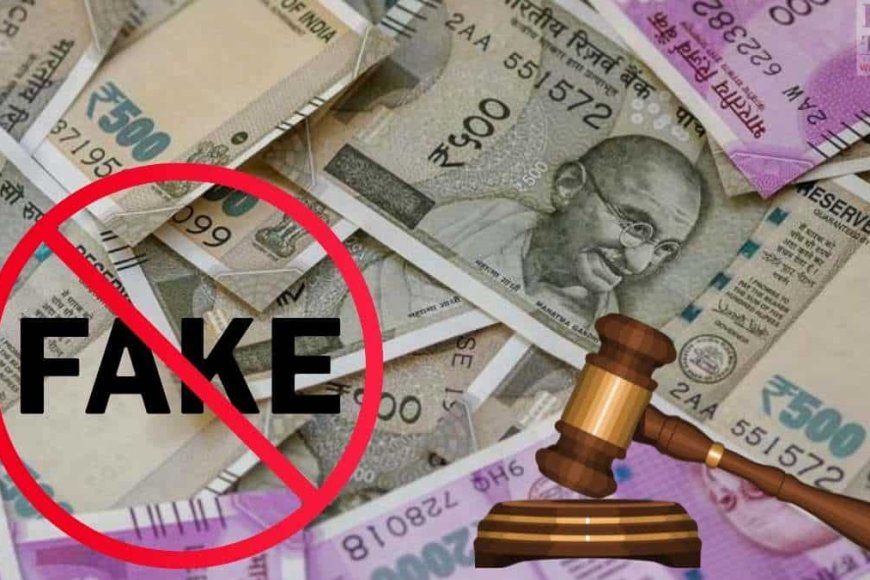

### Project Objective¶
Fake Currency Prediction using Machine Learning Counterfeit currency detection is a growing concern in financial systems, and intelligent prediction models can play a vital role in identifying fraudulent notes. Machine Learning enables accurate and scalable detection, improving security and reducing manual inspection errors. In this project, I analyzed a currency dataset with relevant preprocessing techniques. Multiple classification algorithms were implemented in Python using Scikit-learn and Keras to predict whether a currency note is genuine or counterfeit.


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score #root_mean_squared_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
print('All modules imported!!')

All modules imported!!


In [66]:
df = pd.read_csv('FakeCurrencyModel.csv')

In [67]:
df.head()    #Data head

,variance,skewness,curtosis,entropy,Target
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [68]:
df.tail()   #Data tail

,variance,skewness,curtosis,entropy,Target
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [69]:
df.info()     #Data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   Target    1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [70]:
df.columns     #col naames

Index(['variance', 'skewness', 'curtosis', 'entropy', 'Target'], dtype='object')

## Column Description

    # Variance: How spread out the image details are.
    # Skewness: Whether the image leans more to one side.
    # Curtosis: How sharp or flat the image pattern is.
    # Entropy: How random or messy the image looks.
    # Target: Tells if the note is real (0) or fake (1).

In [71]:
df.shape  #Data shape(rows,col)

(1372, 5)

In [72]:
df.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
Target      0
dtype: int64

In [73]:
df.describe().round(2)

,variance,skewness,curtosis,entropy,Target
count,1372.00,1372.00,1372.00,1372.00,1372.00
mean,0.43,1.92,1.40,-1.19,0.44
std,2.84,5.87,4.31,2.10,0.50
min,-7.04,-13.77,-5.29,-8.55,0.00
25%,-1.77,-1.71,-1.57,-2.41,0.00
50%,0.50,2.32,0.62,-0.59,0.00
75%,2.82,6.81,3.18,0.39,1.00
max,6.82,12.95,17.93,2.45,1.00


In [74]:
df['Target'].value_counts()

Target
0    762
1    610
Name: count, dtype: int64

array([[<Axes: title={'center': 'variance'}>,
        <Axes: title={'center': 'skewness'}>],
       [<Axes: title={'center': 'curtosis'}>,
        <Axes: title={'center': 'entropy'}>],
       [<Axes: title={'center': 'Target'}>, <Axes: >]], dtype=object)

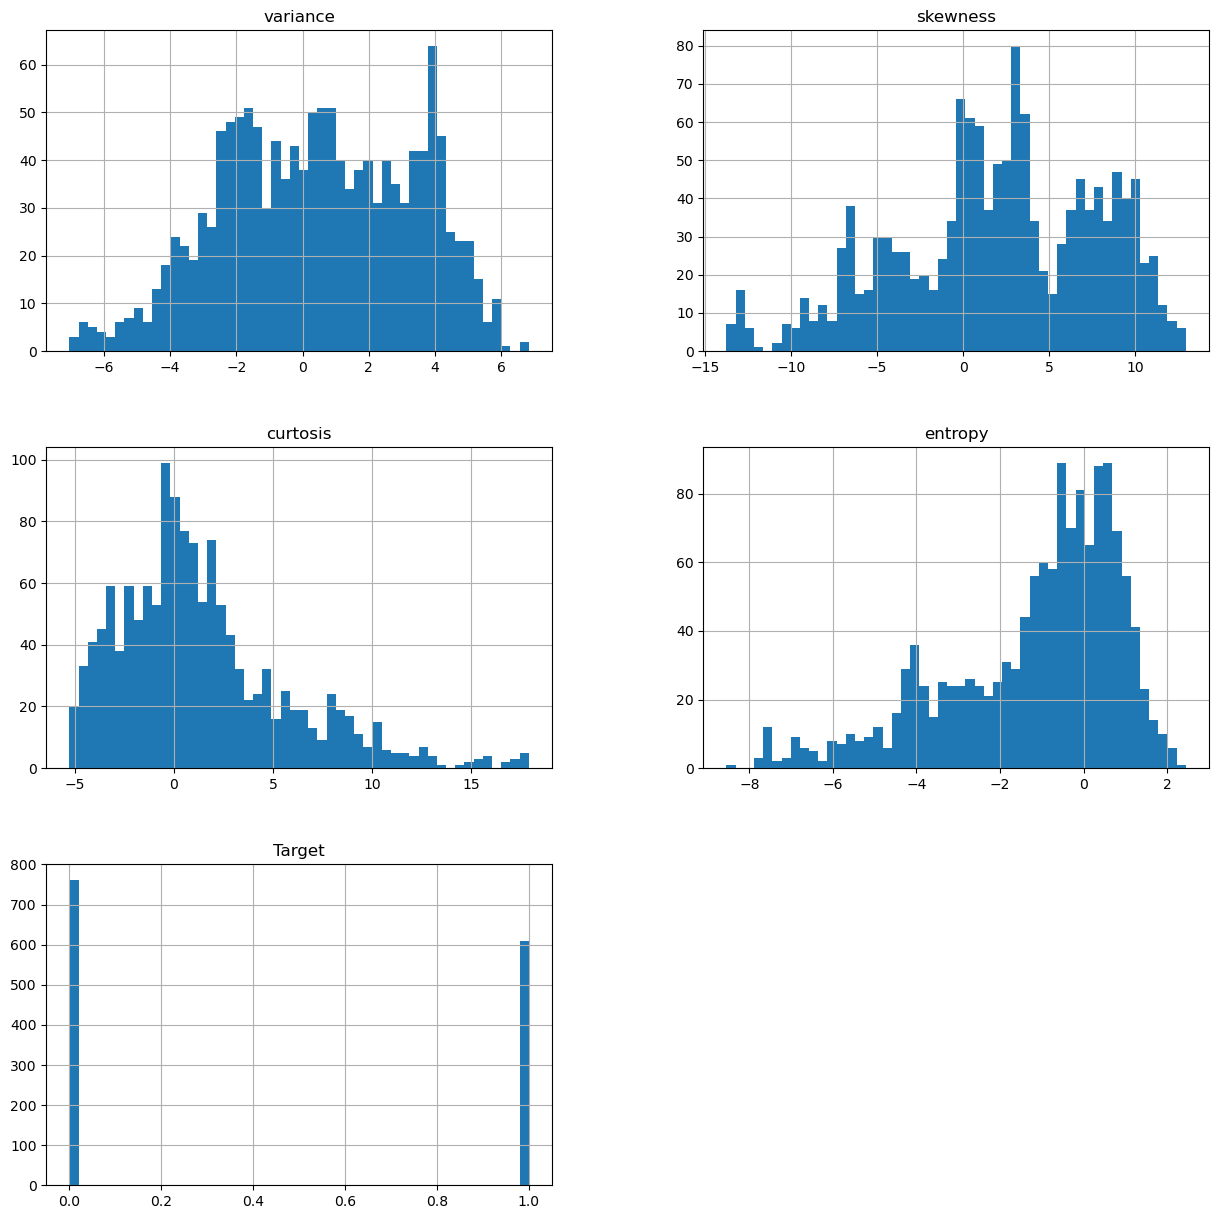

In [79]:
df.hist(bins=50,figsize=(15,15))

In [76]:
df['Target'].value_counts()

Target
0    762
1    610
Name: count, dtype: int64

In [77]:
# UNIVARIATE ANALYSIS :listing each column and its unique values to examine individual feature distributions.
for i in df:
    print(f'Column_{i}',df[i].unique())
    print('------------------------------------',end='\n\n')

Column_variance [ 3.6216  4.5459  3.866  ... -3.7503 -3.5637 -2.5419]
------------------------------------

Column_skewness [  8.6661    8.1674   -2.6383  ... -13.4586   -8.3827   -0.65804]
------------------------------------

Column_curtosis [-2.8073 -2.4586  1.9242 ... 17.5932 12.393   2.6842]
------------------------------------

Column_entropy [-0.44699 -1.4621   0.10645 ... -1.2953  -0.55949 -2.7771 ]
------------------------------------

Column_Target [0 1]
------------------------------------



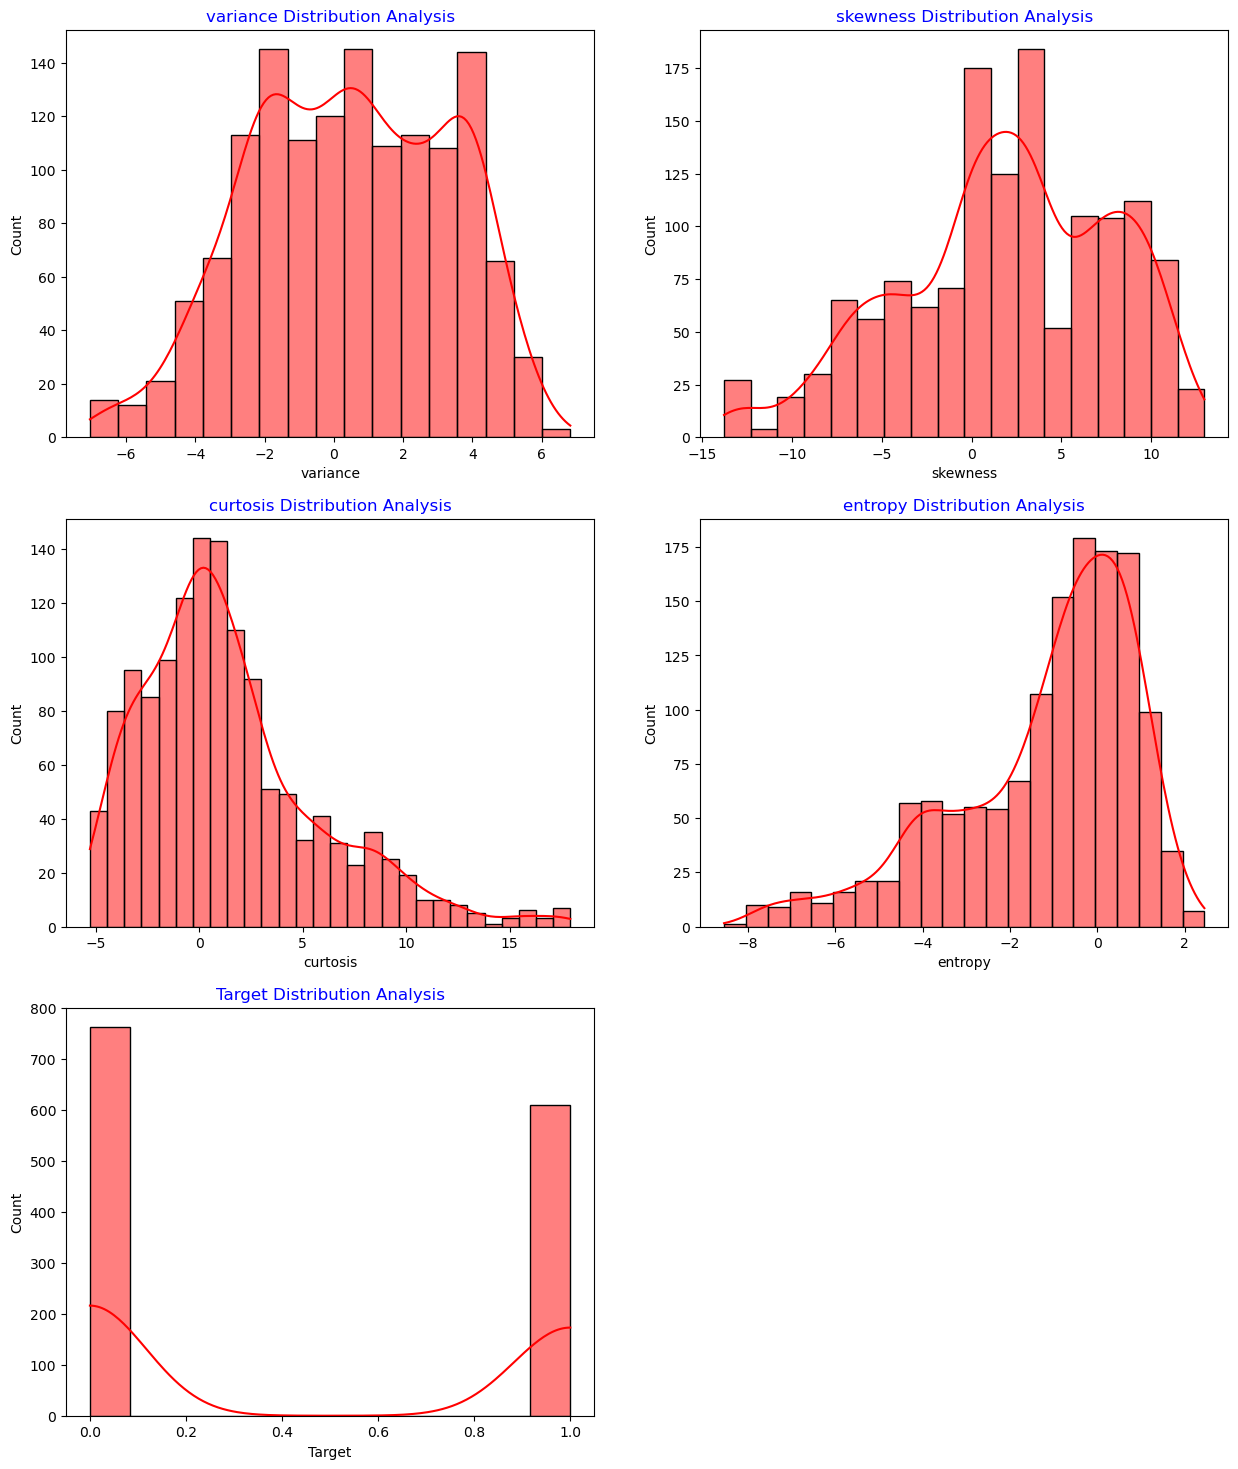

In [12]:
r=3
c=2
plt.figure(figsize=(15,18))
for i,j in enumerate(df):
    plt.subplot(r,c,i+1)
    plt.title(f'{j} Distribution Analysis',color='blue')
    sns.histplot(df[j],kde=True,color='r')

plt.savefig('All numerical features analysis.jpeg',dpi=200)
plt.show()

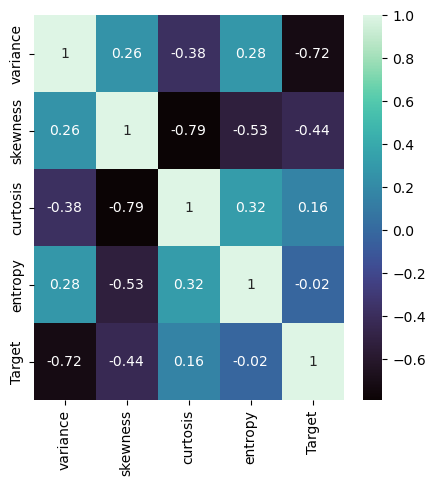

In [13]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr().round(2),cmap='mako',annot = True)
plt.show()

In [14]:
# Target vs Features correlation

df.corr()['Target'].round(2).sort_values(ascending=False).reset_index()

,index,Target
0,Target,1.00
1,curtosis,0.16
2,entropy,-0.02
3,skewness,-0.44
4,variance,-0.72


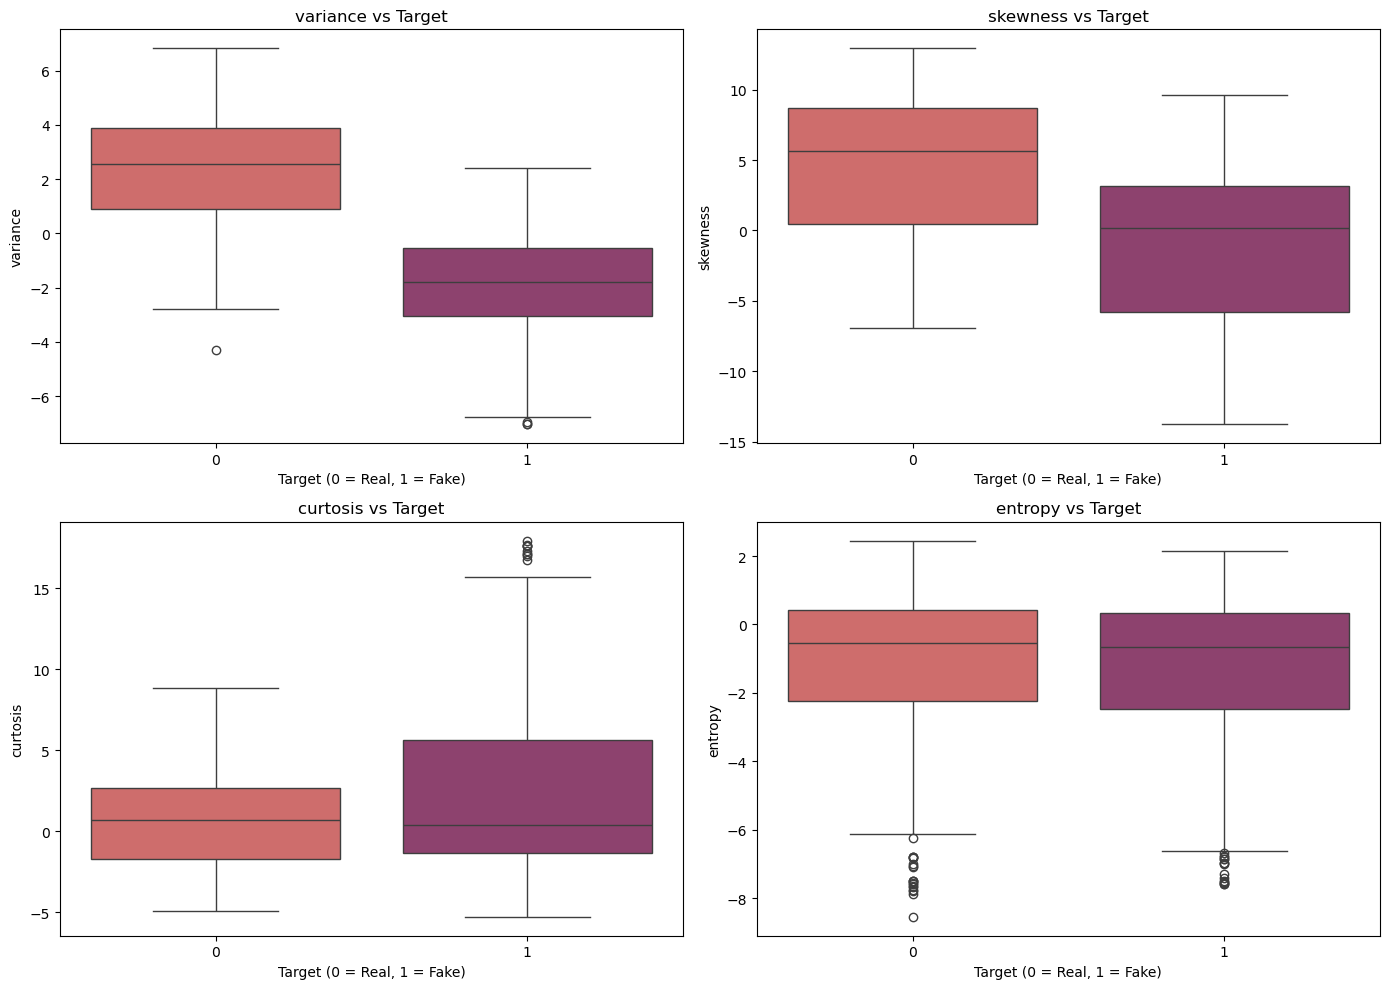

In [15]:
# BIVARIATE ANALYSIS

import matplotlib.pyplot as plt
import seaborn as sns

x_col = ['variance', 'skewness', 'curtosis', 'entropy']
r, c = 2, 2  # 2x2 grid for 4 features

plt.figure(figsize=(14, 10))

for i in range(len(x_col)):
    plt.subplot(r, c, i+1)
    sns.boxplot(data=df, x='Target', y=x_col[i], palette='flare')    # BOXPLOT
    plt.title(f'{x_col[i]} vs Target')
    plt.xlabel('Target (0 = Real, 1 = Fake)')
    plt.ylabel(x_col[i])

plt.tight_layout()
plt.show()



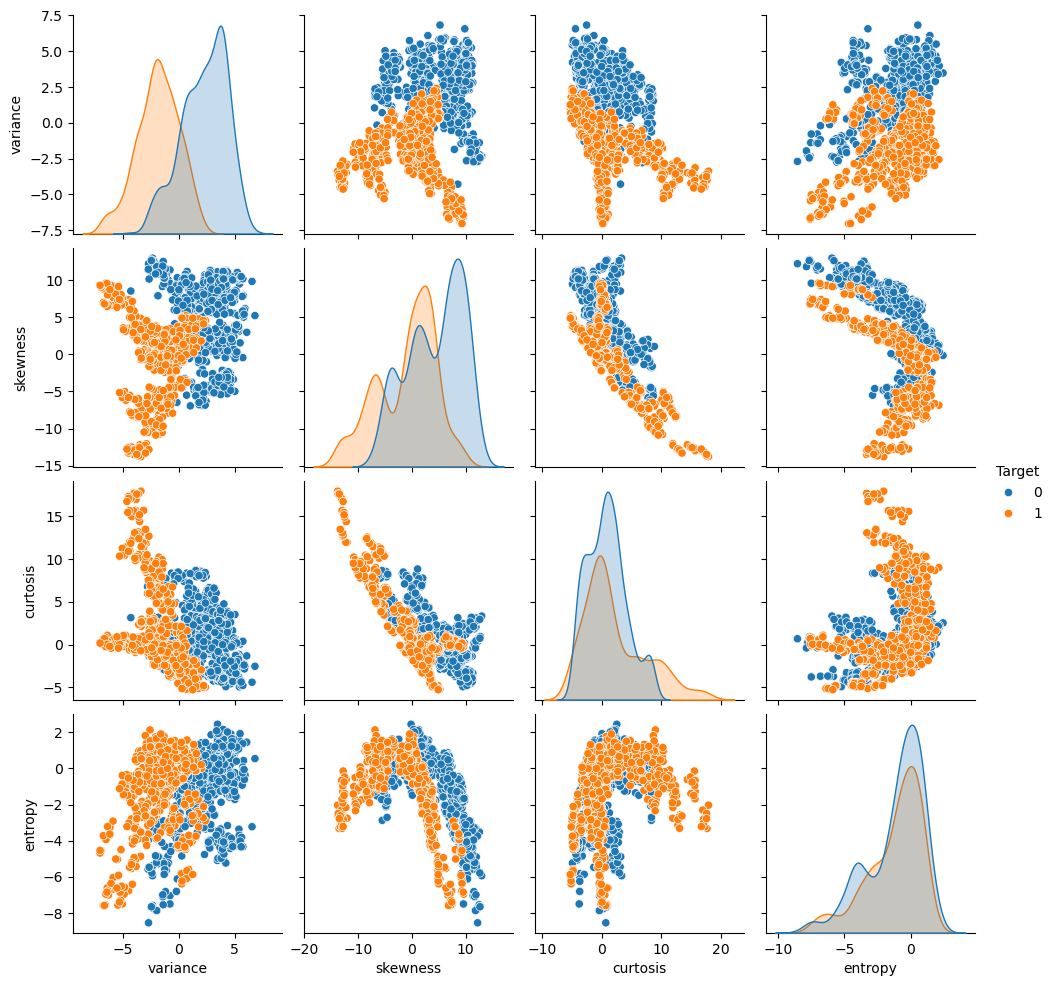

In [81]:
# PAIRPLOT
sns.pairplot(data= df,hue='Target')
plt.savefig("Pairplot.png",dpi=300,bbox_inches='tight')        #bbox_inches='tight' cuts the extra whitespace around the figure
plt.show() 

In [17]:
# train test split
   # Divide data into target & features
X = df.iloc[:,:-1]
y= df['Target']


In [18]:
X.shape,y.shape

((1372, 4), (1372,))

In [19]:
#  Train-test split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1097, 4)
(275, 4)
(1097,)
(275,)


### MULTI-MODEL CREATION

In [21]:
# LogisticRegression

from sklearn.linear_model  import LogisticRegression

model_lr =  LogisticRegression()        #model object

model_lr.fit(X_train,y_train)           #trainingmodel  & 


LogisticRegression()

In [22]:
y_pred= model_lr.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0])

In [23]:
# importing model evaluation metrics for classification

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [24]:
#  Importing confusion matrix to evaluate classificationmodel
from sklearn.metrics import confusion_matrix

In [25]:
cm=confusion_matrix(y_test,y_pred)

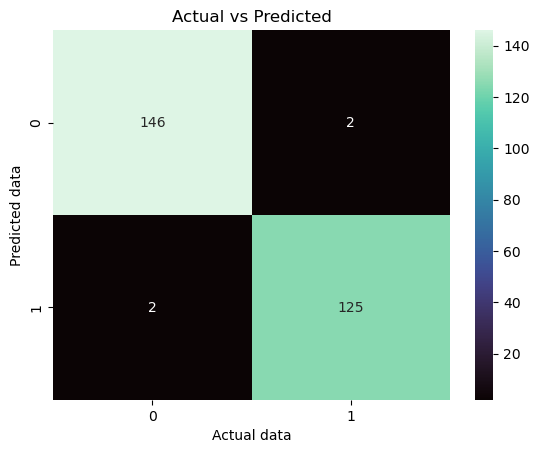

In [26]:
plt.title('Actual vs Predicted')
sns.heatmap(cm,annot = True,cmap ='mako',fmt='d')
plt.xlabel('Actual data')
plt.ylabel('Predicted data')
# plt.xticks([0, 1], ['Real', 'Fake'])
# plt.yticks([0, 1], ['Real', 'Fake'])

plt.show()

In [27]:
TN,FP,FN,TP=cm.ravel()   # here ravel means making 1d array & unpacking 4 parts


In [28]:
# precision score  prs
prs=TP/(TP+FP)   #manually
prs

np.float64(0.984251968503937)

In [29]:
precision_score(y_test,y_pred)  #through method

0.984251968503937

In [30]:
# accuracy score
acs =  (TN+TP)/(TN+FP+TP+FN)
acs

np.float64(0.9854545454545455)

In [31]:
accuracy_score(y_test,y_pred)

0.9854545454545455

In [32]:
# recall 
# it will tell how much true it is b/w +ve & -ve
rs= recall_score(y_test,y_pred)
print('Recall score is :',rs)

Recall score is : 0.984251968503937


In [33]:
# f1 score :we find it if ps<rs or both have tie(same value)
f1_s= f1_score(y_test,y_pred)   
print('f1 score',f1_s)

f1 score 0.984251968503937


In [34]:
print(classification_report(y_test,y_pred))  

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       148
           1       0.98      0.98      0.98       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [35]:
#  checking model score
lr_score = model_lr.score(X_test,y_test)
lr_score

0.9854545454545455

### NaiveBayes Ml Model

In [36]:
from sklearn.naive_bayes import GaussianNB

model_nv= GaussianNB()

model_nv.fit(X_train,y_train)

GaussianNB()

In [37]:
y_pred =model_nv.predict(X_test)

In [38]:
nv_score = model_nv.score(X_test,y_test)
print('Naive Bayes score:',nv_score)

Naive Bayes score: 0.8072727272727273


In [39]:
print('Accuracy Score:',accuracy_score(y_test,y_pred))
print('Precision Score:',precision_score(y_test,y_pred))
print('Recall Score:',recall_score(y_test,y_pred))
print('F1 Score:',f1_score(y_test,y_pred))

Accuracy Score: 0.8072727272727273
Precision Score: 0.8557692307692307
Recall Score: 0.7007874015748031
F1 Score: 0.7705627705627706


In [40]:
print(classification_report(y_test,y_pred)) 

              precision    recall  f1-score   support

           0       0.78      0.90      0.83       148
           1       0.86      0.70      0.77       127

    accuracy                           0.81       275
   macro avg       0.82      0.80      0.80       275
weighted avg       0.81      0.81      0.80       275



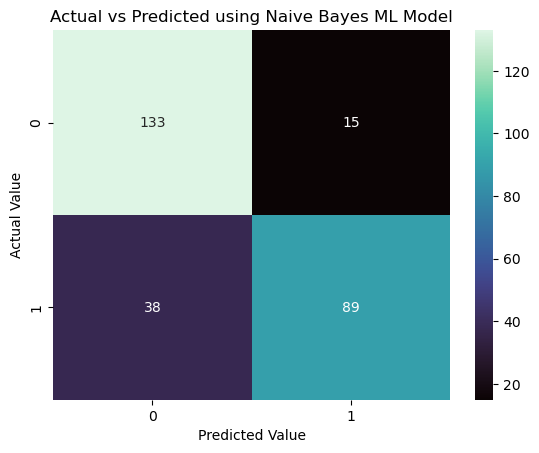

In [41]:
cm = confusion_matrix(y_test,y_pred)

plt.title('Actual vs Predicted using Naive Bayes ML Model')
sns.heatmap(cm,annot = True,cmap='mako',fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

### Support Vector Machine Ml Model

In [42]:
from sklearn.svm import SVC

model_svc = SVC()

model_svc.fit(X_train,y_train)

SVC()

In [43]:
y_pred =model_svc.predict(X_test)

In [50]:
svc_score= model_svc.score(X_test,y_test)
svc_score

1.0

In [44]:
print('Accuracy Score:',accuracy_score(y_test,y_pred))
print('Precision Score:',precision_score(y_test,y_pred))
print('Recall Score:',recall_score(y_test,y_pred))
print('F1 Score:',f1_score(y_test,y_pred))

Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
F1 Score: 1.0


In [45]:
print(classification_report(y_test,y_pred)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       127

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



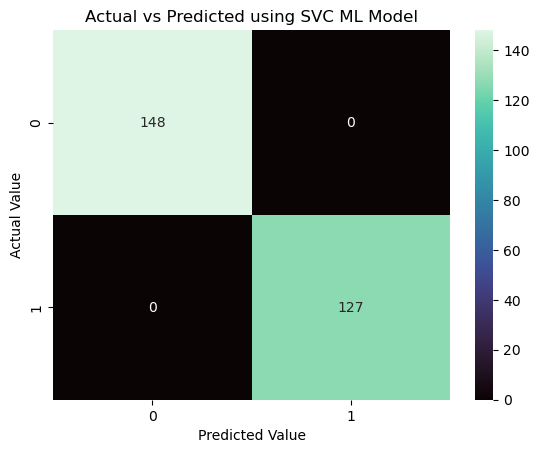

In [46]:
cm = confusion_matrix(y_test,y_pred)

plt.title('Actual vs Predicted using SVC ML Model')
sns.heatmap(cm,annot = True,cmap='mako',fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [51]:
lr_score,nv_score,svc_score

(0.9854545454545455, 0.8072727272727273, 1.0)

### Decision Tree Model

In [56]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()

model_dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [57]:
y_pred =model_dt.predict(X_test)

In [58]:
print('Accuracy Score:',accuracy_score(y_test,y_pred))
print('Precision Score:',precision_score(y_test,y_pred))
print('Recall Score:',recall_score(y_test,y_pred))
print('F1 Score:',f1_score(y_test,y_pred))

Accuracy Score: 0.9818181818181818
Precision Score: 1.0
Recall Score: 0.9606299212598425
F1 Score: 0.9799196787148594


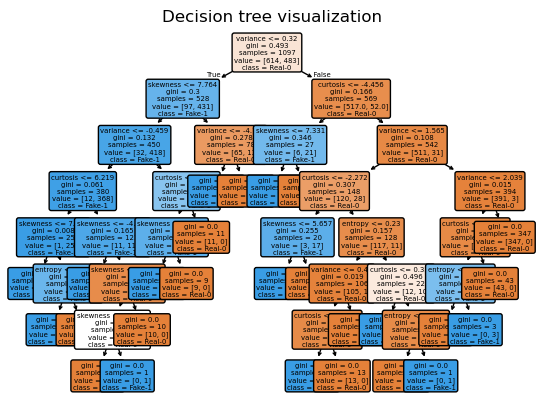

In [59]:
from sklearn.tree import plot_tree
plot_tree(model_dt,
         feature_names = X.columns,
         class_names= ['Real-0','Fake-1'],
         filled = True,
         rounded =True,
         fontsize= 5)
plt.title('Decision tree visualization')
plt.show()

In [82]:
dt_score=accuracy_score(y_test,y_pred)
dt_score

0.9818181818181818

### Random Forest ML Model

In [83]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators = 200)

model_rf.fit(X_train,y_train) 

RandomForestClassifier(n_estimators=200)

In [84]:
y_pred =model_rf.predict(X_test)

In [87]:
rf_score = accuracy_score(y_test,y_pred)
rf_score

0.9927272727272727

In [85]:
print('Accuracy Score:',accuracy_score(y_test,y_pred))
print('Precision Score:',precision_score(y_test,y_pred))
print('Recall Score:',recall_score(y_test,y_pred))
print('F1 Score:',f1_score(y_test,y_pred))

Accuracy Score: 0.9927272727272727
Precision Score: 1.0
Recall Score: 0.984251968503937
F1 Score: 0.9920634920634921


In [86]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       148
           1       1.00      0.98      0.99       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



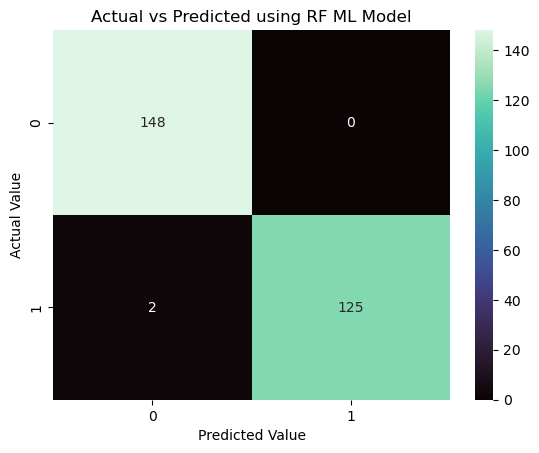

In [92]:
cm = confusion_matrix(y_test,y_pred)

plt.title('Actual vs Predicted using RF ML Model')
sns.heatmap(cm,annot = True,cmap='mako',fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [93]:
all_model_score = [lr_score, nv_score,svc_score,dt_score,rf_score]
model_name = ['Logistic','Naive','SVC','Decision Tree','Random forst']

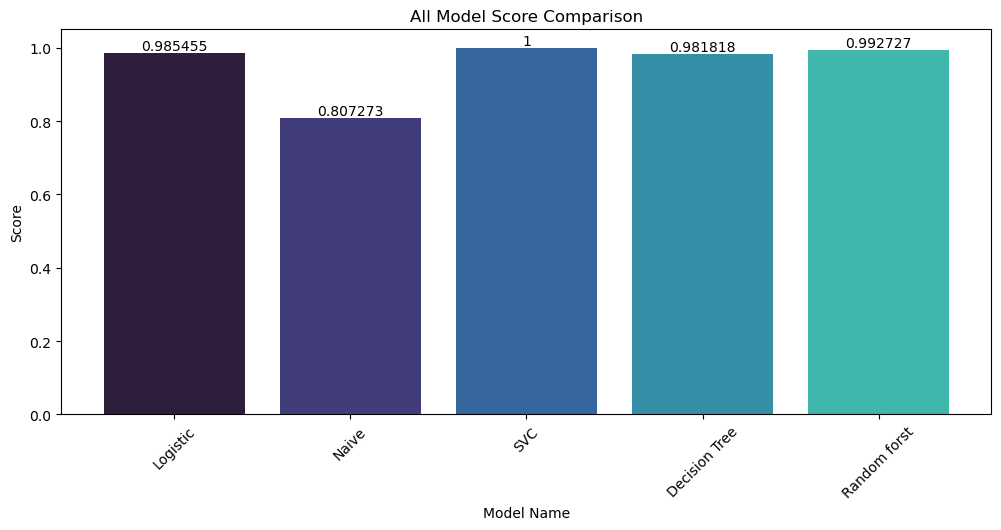

In [94]:
plt.figure(figsize=(12,5))
plt.title('All Model Score Comparison')
ax = plt.bar(model_name,all_model_score,color = sns.color_palette('mako',6))
plt.bar_label(ax)
plt.xlabel('Model Name')
plt.ylabel('Score')
plt.xticks(rotation = 45)
plt.show()

In [95]:
import pickle 
with open('fake_currency_pred.pkl','wb') as f:
    pickle.dump(model_rf,f)
print('done')

done
